## 2.4.3 확률적 경사 하강법

In [1]:
# 물리학에서 영감을 얻은 모멘텀
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient  = get_current_parameters()
    velocity = momentum * past_velocity - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

NameError: name 'loss' is not defined

In [2]:
# 다시보는 앞선 코드
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

NameError: name 'network' is not defined

# 3.1 신경망의 구조

1. 네트워크(또는 모델)를 구성하는 층
2. 입력 데이터와 그에 상응하는 타깃
3. 학습에 사용할 피드백 신호를 정의하는 손실 함수
4. 학습 진행 방식을 결정하는 옵티마이저

## 3.1.1 층 : 딥러닝의 구성 단위

완전 연결층(fully connected layer), 밀집층(dense layer), 밀집 연결 층(densely connected layer)  
3D 텐서로 저장된 시퀀스 데이터는 보통 LSTM과 같은 순환 층(recurrent layer)에 의해 처리  
4D 텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D 합성곱 층(convolution layer)에 의해 처리  

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# 같은 모델을 함수형 API를 사용하여 만들어 보면,
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32,activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [22]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

In [23]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

## 3.4.1 IMDB 데이터셋

In [24]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [25]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:
train_labels[0]

1

In [27]:
max([max(sequence) for sequence in train_data])

9999

In [29]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [33]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [34]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [35]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [40]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [41]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
# 옵티마이저 직접 설정하기
from tensorflow import keras

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [49]:
# 손실과 측정을 함수 객체로 지정하기
from tensorflow import keras

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
             loss=keras.losses.binary_crossentropy,
             metrics=[keras.metrics.binary_accuracy])

## 3.4.4 훈련 검증

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [51]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5146 - acc: 0.7958 - val_loss: 0.4016 - val_acc: 0.8574
Epoch 2/20
30/30 [==============================] - 1s 16ms/step - loss: 0.3185 - acc: 0.9009 - val_loss: 0.3214 - val_acc: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2349 - acc: 0.9245 - val_loss: 0.2872 - val_acc: 0.8861
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1852 - acc: 0.9415 - val_loss: 0.2998 - val_acc: 0.8784
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1514 - acc: 0.9523 - val_loss: 0.2794 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1249 - acc: 0.9613 - val_loss: 0.2866 - val_acc: 0.8876
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1058 - acc: 0.9675 - val_loss: 0.3011 - val_acc: 0.8854
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0877 - a

In [52]:
history_dict = history.history

In [53]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

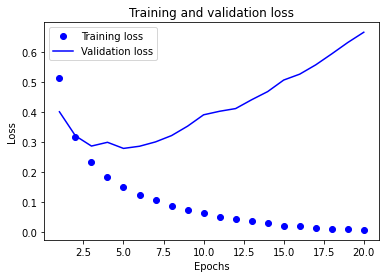

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

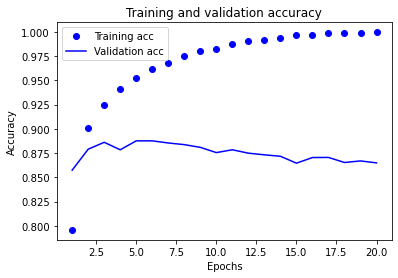

In [55]:
plt.clf() # 그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [58]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
rersults = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4968 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2854 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2092 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 1s 703us/step - loss: 0.3008 - accuracy: 0.8829


## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [59]:
model.predict(x_test)

array([[0.12545499],
       [0.99763656],
       [0.5513122 ],
       ...,
       [0.05897111],
       [0.04297864],
       [0.5485426 ]], dtype=float32)

# 3.5 뉴스 기사 분류: 다중 분류 문제

## 3.5.1 로이터 데이터셋

In [60]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [61]:
len(train_data)

8982

In [62]:
len(test_data)

2246